In [1]:
#Import dependencies
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#Read csv with homeless numbers
data_df = pd.read_csv("Resources/aihw-hou-321-SHS-data-tables_Aug-2021.csv")
data_df

,Table of contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,"SHS clients, by state/territory, age group and...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Month,Sex,Age group,NSW,Vic,Qld,WA,SA,Tas,ACT,NT,National
3,JUN21,Female,0–4 years,"1,179","1,218",720,315,259,59,86,140,"3,972"
4,JUN21,Female,5–9 years,964,"1,100",632,215,216,45,85,130,"3,384"
...,...,...,...,...,...,...,...,...,...,...,...,...
2304,JUL17,Total,60–64 years,416,694,181,119,86,52,25,82,"1,654"
2305,JUL17,Total,65+ years,476,"1,178",188,163,80,65,23,82,"2,254"
2306,JUL17,Total,All Ages,"22,016","30,510","10,650","5,932","6,308","2,270","1,606","2,895","81,977"
2307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Clean dataframe
#drop NA
clean_df = data_df.dropna(how = "any")
#Set column headers and reset index
clean_df.columns = clean_df.iloc[0]
clean_df = clean_df.drop([2]).reset_index(drop = True)
#Convert date to datetime format
clean_df["Date"] = pd.to_datetime(clean_df["Month"], format = "%b%y")
#Remove all unwanted columns
clean_df = clean_df.drop(["NSW", "Vic", "Qld", "SA", "Tas", "ACT", "NT", "National", "Month"],axis = 1)
#Rename columns
clean_df = clean_df.rename(columns = {"WA": "Homeless clients"})
#Convert homeless clients to float
clean_df["Homeless clients"] = (clean_df["Homeless clients"].str.split()).apply(lambda x: float(x[0].replace(",", "")))
clean_df = clean_df.astype({"Homeless clients": "float"})
clean_df

2,Sex,Age group,Homeless clients,Date
0,Female,0–4 years,315.0,2021-06-01
1,Female,5–9 years,215.0,2021-06-01
2,Female,10–14 years,229.0,2021-06-01
3,Female,15–17 years,230.0,2021-06-01
4,Female,18–19 years,204.0,2021-06-01
...,...,...,...,...
2299,Total,50–54 years,305.0,2017-07-01
2300,Total,55–59 years,174.0,2017-07-01
2301,Total,60–64 years,119.0,2017-07-01
2302,Total,65+ years,163.0,2017-07-01


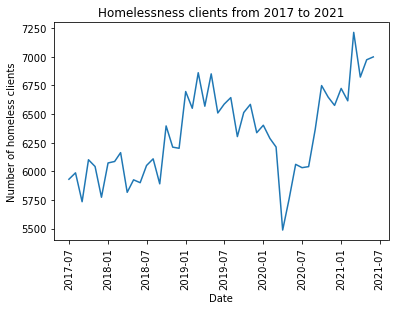

In [4]:
#Plot change in homeless clients over time
monthly_df = clean_df[["Date", "Homeless clients"]].loc[clean_df["Age group"] == "All Ages"].reset_index(drop = True)
plt.plot(monthly_df["Date"], monthly_df["Homeless clients"])
plt.xticks(rotation = 90)
plt.title("Homelessness clients from 2017 to 2021")
plt.xlabel("Date")
plt.ylabel("Number of homeless clients")
plt.show()

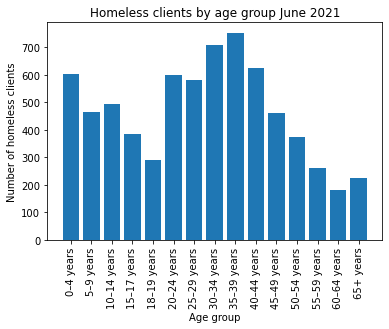

In [5]:
#Plot bar graph of homeless clients by age group
age_df = clean_df.loc[(clean_df["Age group"] != "All Females")
             & (clean_df["Age group"] != "All Males")
             & (clean_df["Age group"] != "All Ages")
             & (clean_df["Sex"] == "Total")
             & (clean_df["Date"] == "2021-06-01")
            ]
plt.bar(age_df["Age group"], age_df["Homeless clients"])
plt.xticks(rotation = 90)
plt.title("Homeless clients by age group June 2021")
plt.xlabel("Age group")
plt.ylabel("Number of homeless clients")
plt.show()

In [6]:
#Read csv with indigenous numbers
indigenous_df = pd.read_csv("Resources/indigenous.csv")
indigenous_df.head()

,Table of contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Table INDIGENOUS.2: Clients and support period...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Indigenous status,Data type,Sex,NSW,Vic,Qld,WA,SA,Tas,ACT,NT,National(a)
3,Indigenous clients,Clients (number),Males,"8,294","4,146","5,677","4,455","1,924",423,294,"3,084","27,812"
4,Indigenous clients,Clients (number),Females,"12,181","6,252","9,038","7,655","2,900",560,330,"5,657","43,770"


In [7]:
#Clean indigenous dataframe
#drop NA
clean_indigenous_df = indigenous_df.dropna(how = "any")
#Set column headers and reset index
clean_indigenous_df.columns = clean_indigenous_df.iloc[0]
clean_indigenous_df = clean_indigenous_df.drop([2])
#Only select client numbers
clean_indigenous_df = clean_indigenous_df.loc[(clean_indigenous_df["Data type"] == "Clients (number)")
                                             & (clean_indigenous_df["Sex"] == "All clients")]
#Remove all unwanted columns
clean_indigenous_df = clean_indigenous_df.drop(["Sex", "Data type", "NSW", "Vic", "Qld", "SA", "Tas", "ACT", "NT", "National(a)"],axis = 1)
#Rename columns
clean_indigenous_df = clean_indigenous_df.rename(columns = {"WA": "Homeless clients"})
#Convert homeless clients to float
clean_indigenous_df["Homeless clients"] = (clean_indigenous_df["Homeless clients"].str.split()).apply(lambda x: float(x[0].replace(",", "")))
clean_indigenous_df = clean_indigenous_df.astype({"Homeless clients": "float"})
clean_indigenous_df

2,Indigenous status,Homeless clients
5,Indigenous clients,12110.0
18,Non-Indigenous clients,12629.0


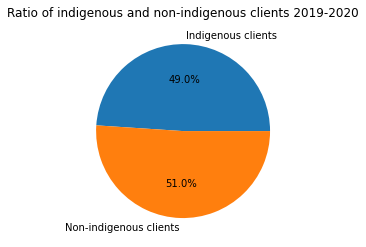

In [8]:
#Create plot comparing indigenous and non-indigenous clients in WA
labels = ["Indigenous clients", "Non-indigenous clients"]
plt.pie(clean_indigenous_df["Homeless clients"], labels = labels, autopct = "%1.1f%%")
plt.title("Ratio of indigenous and non-indigenous clients 2019-2020")
plt.show()

#Note: of 290,462 clients in the nation, 22,141 (7.6%) do not have a reported indigenous status.
#WA have 24,739 clients, or 8.5% of the nation's clients.